Data Analysis for a Sales Data

In [51]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
# load dataset
df = pd.read_csv('Sales Data.csv', encoding='unicode_escape')

In [53]:
df.shape

(11251, 15)

In [54]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


Data Cleaning

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [56]:
# Drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [57]:
# Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [58]:
# Drop Null values
df.dropna(inplace=True)

In [59]:
# Change the datatype of Amount column from float to int 
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [60]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [61]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


Exploratory Data Analysis (EDA)

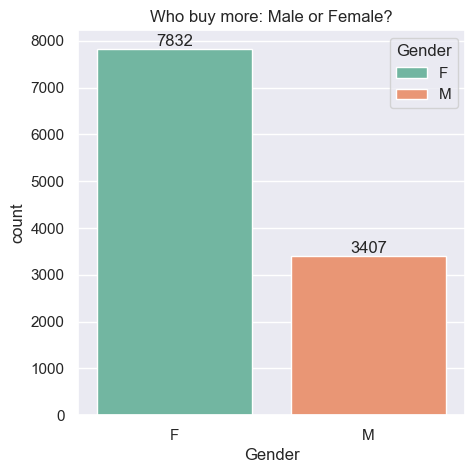

In [62]:
# Gender based
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=True)

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Who buy more: Male or Female?")
plt.show()

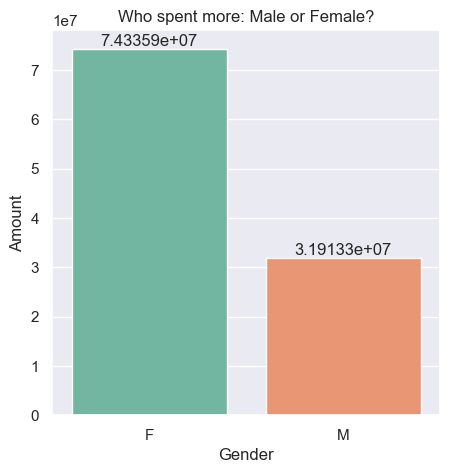

In [63]:
# Based on Amount who expense more male or female?

sns.set(rc={'figure.figsize':(5,5)})

sales_gen = df.groupby('Gender', as_index=False)['Amount'].sum()
sales_gen = sales_gen.sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, hue='Gender', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Who spent more: Male or Female?")
plt.show()


From above graphs we can see that most of the buyers are female and also they spent more.

AGE

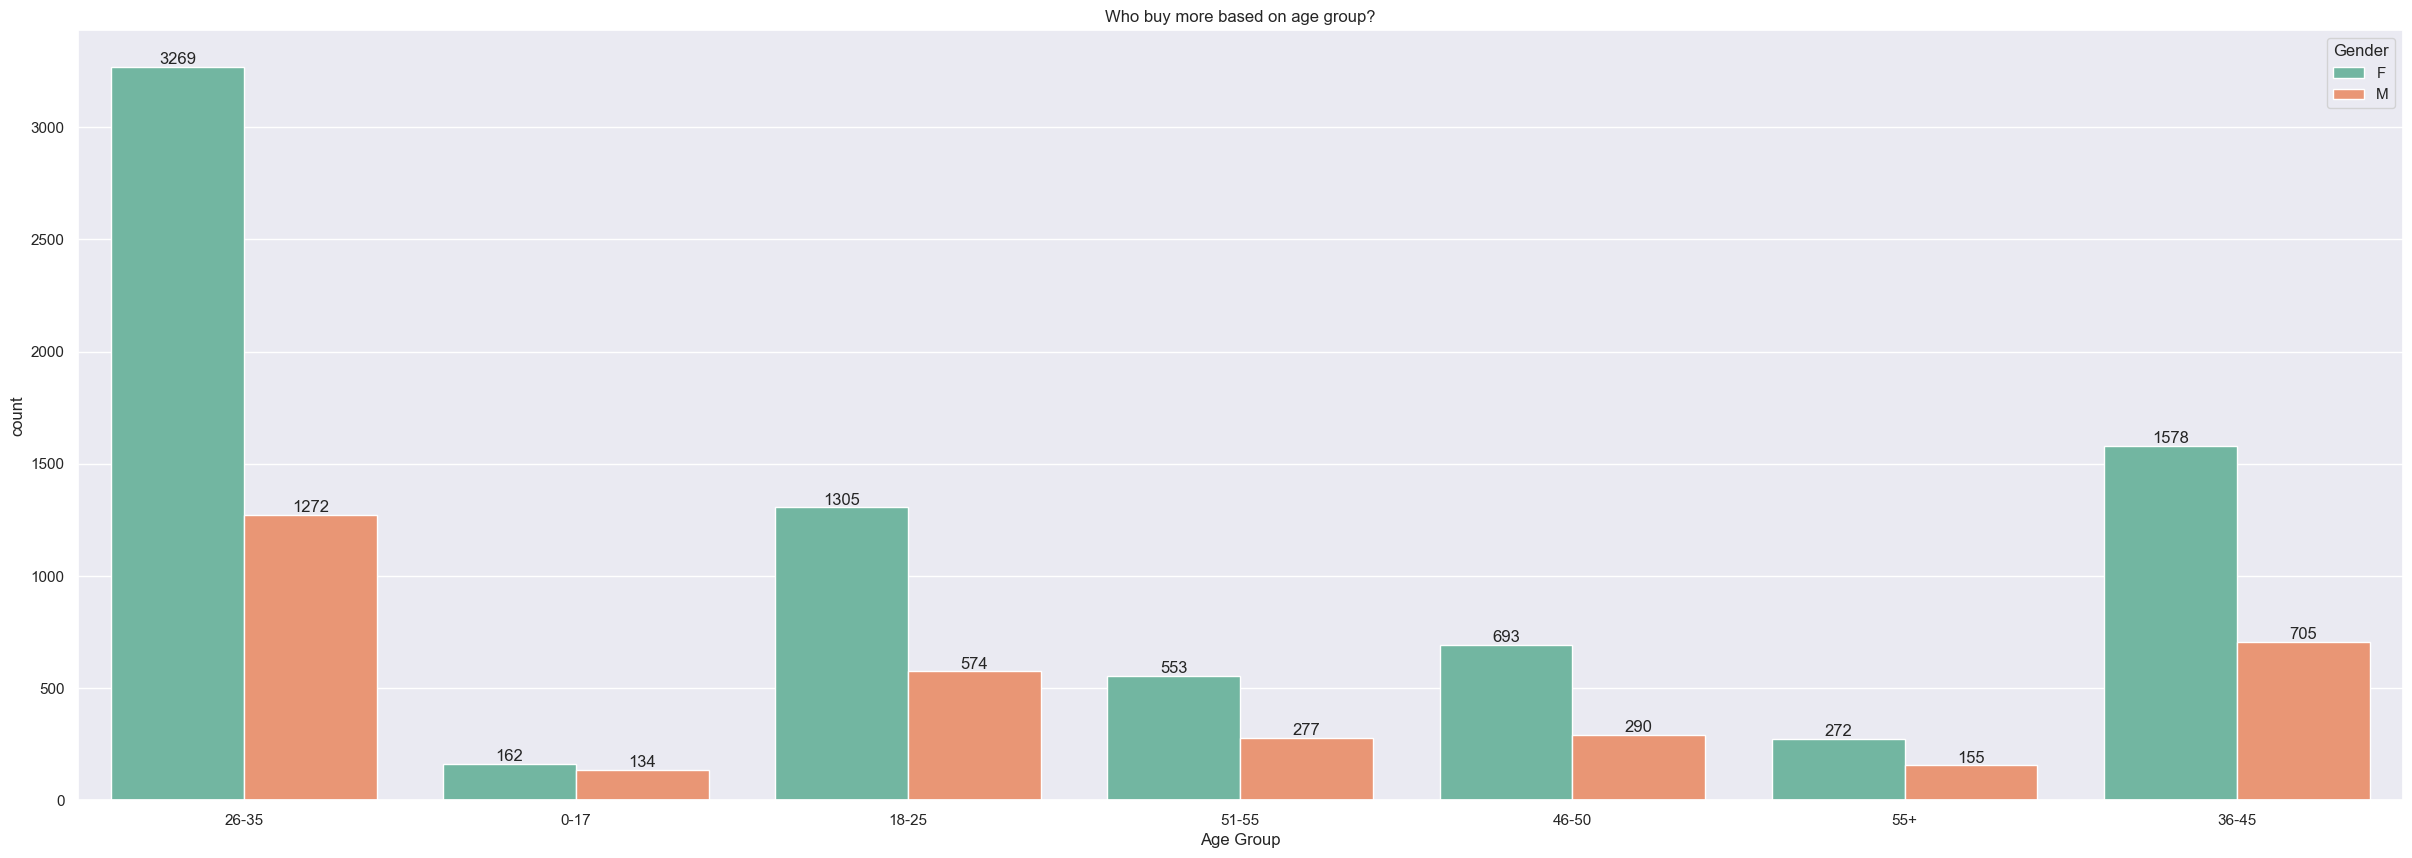

In [75]:
# Age group 

ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette='Set2', legend=True)

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Who buy more based on age group?")
plt.show()

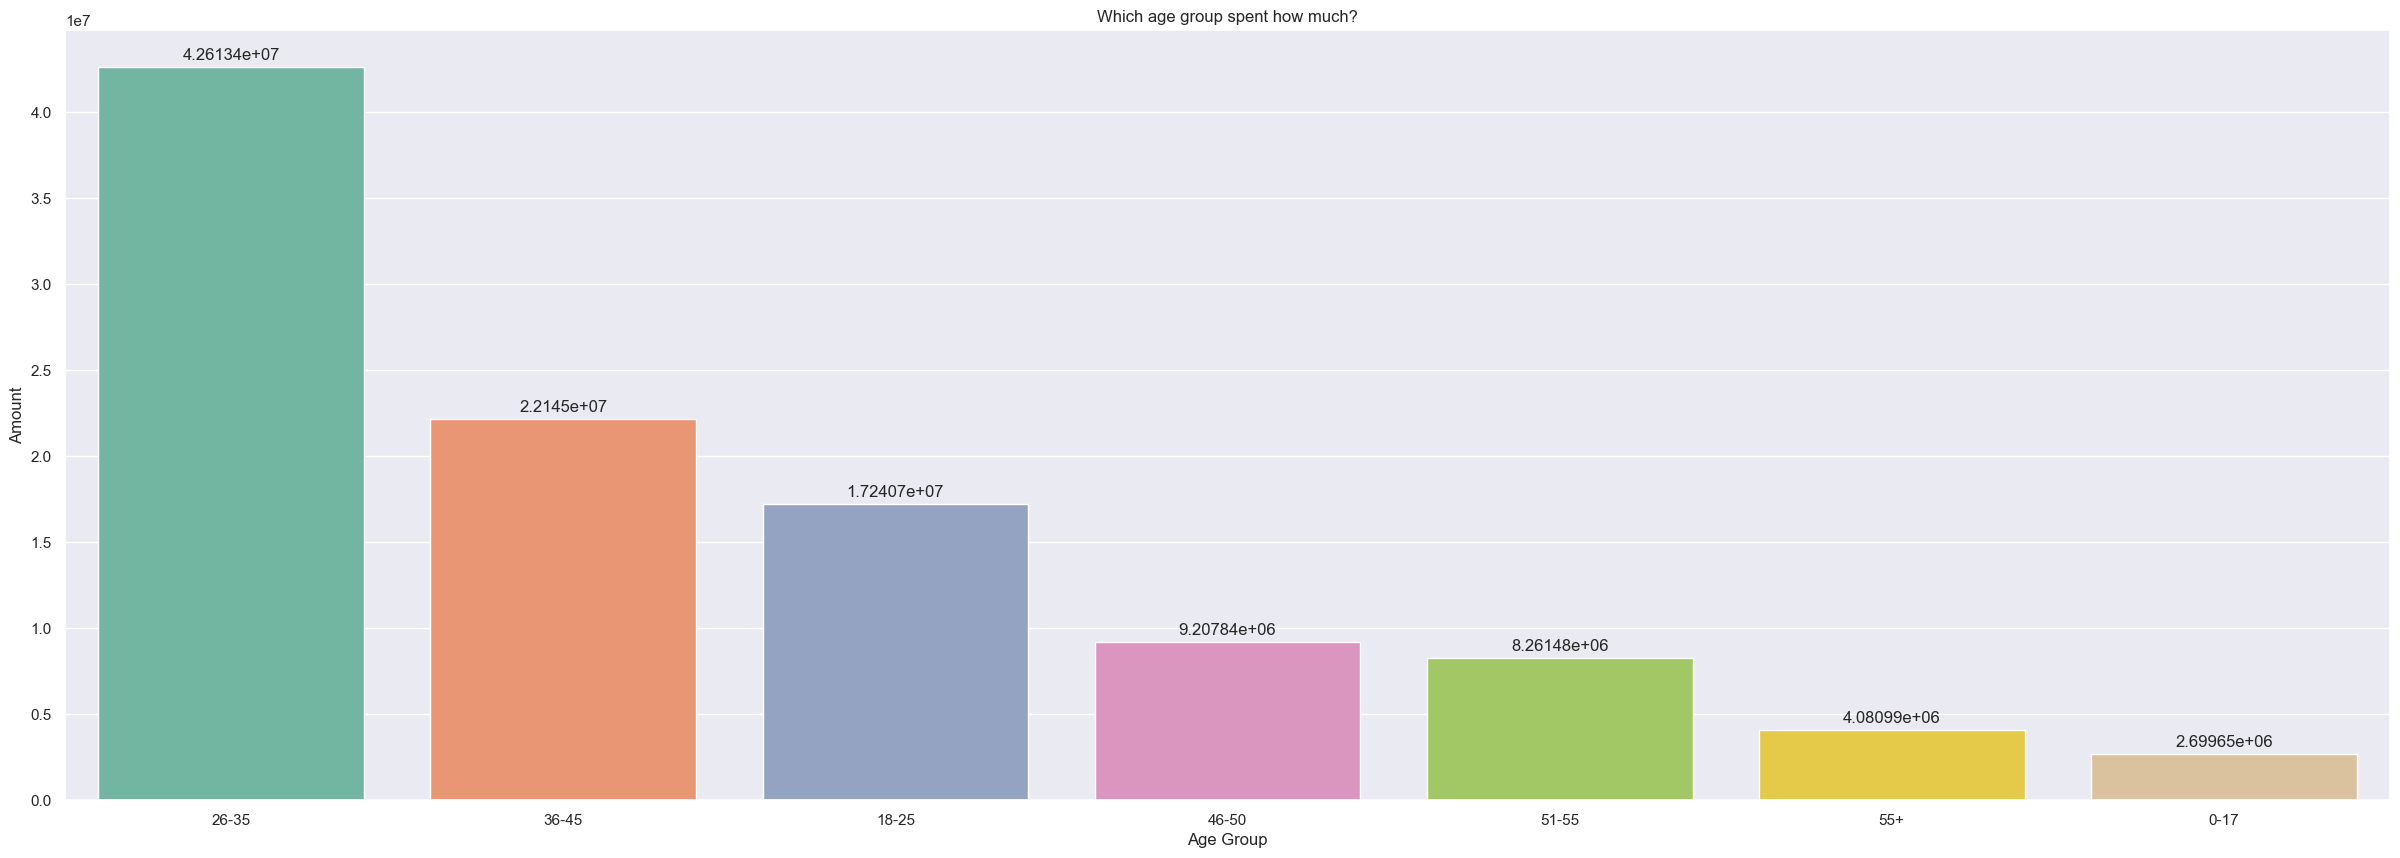

In [76]:
# Based on Amount which age group expense more?

sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum()
sales_age = sales_age.sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Age Group', y='Amount', data=sales_age,hue='Age Group', palette='Set2', order=sales_age['Age Group'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
    
plt.title("Which age group spent how much?")
plt.show()


From above graphs we can see that most of the buyers are female and age group between 26-35

State

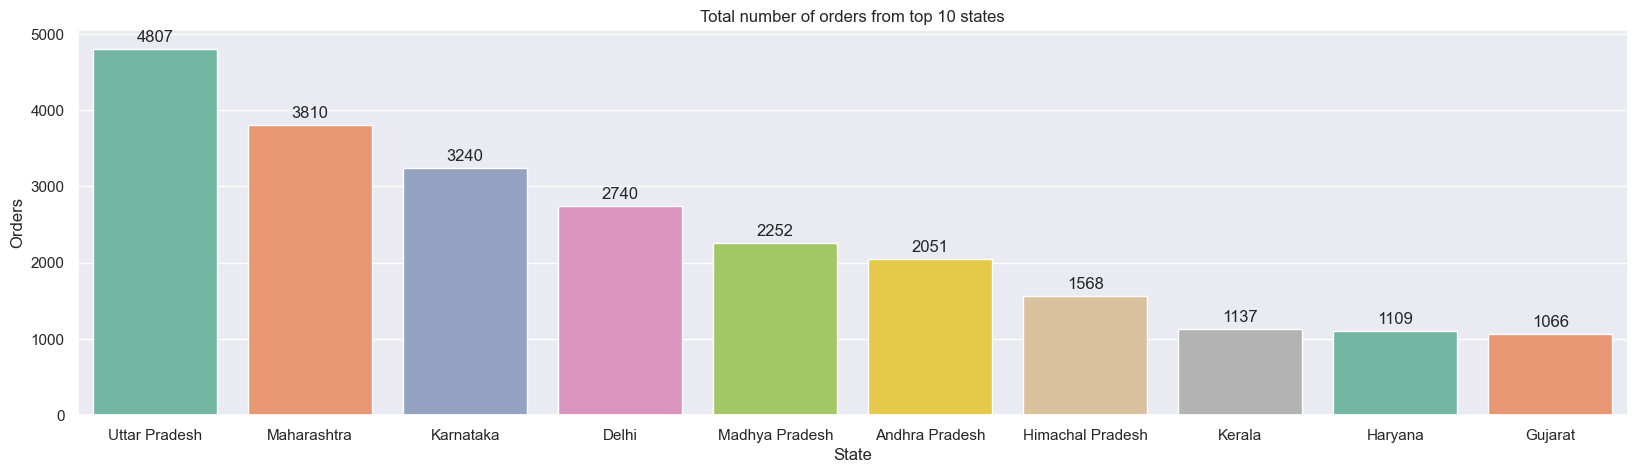

In [66]:
# Total number of orders from top 10 states 

sns.set(rc={'figure.figsize':(20,5)})

sales_state = df.groupby('State', as_index=False)['Orders'].sum()
sales_state = sales_state.sort_values(by='Orders', ascending=False).head(10)

ax = sns.barplot(x='State', y='Orders', data=sales_state, hue='State', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)  
plt.title("Total number of orders from top 10 states")
plt.show()

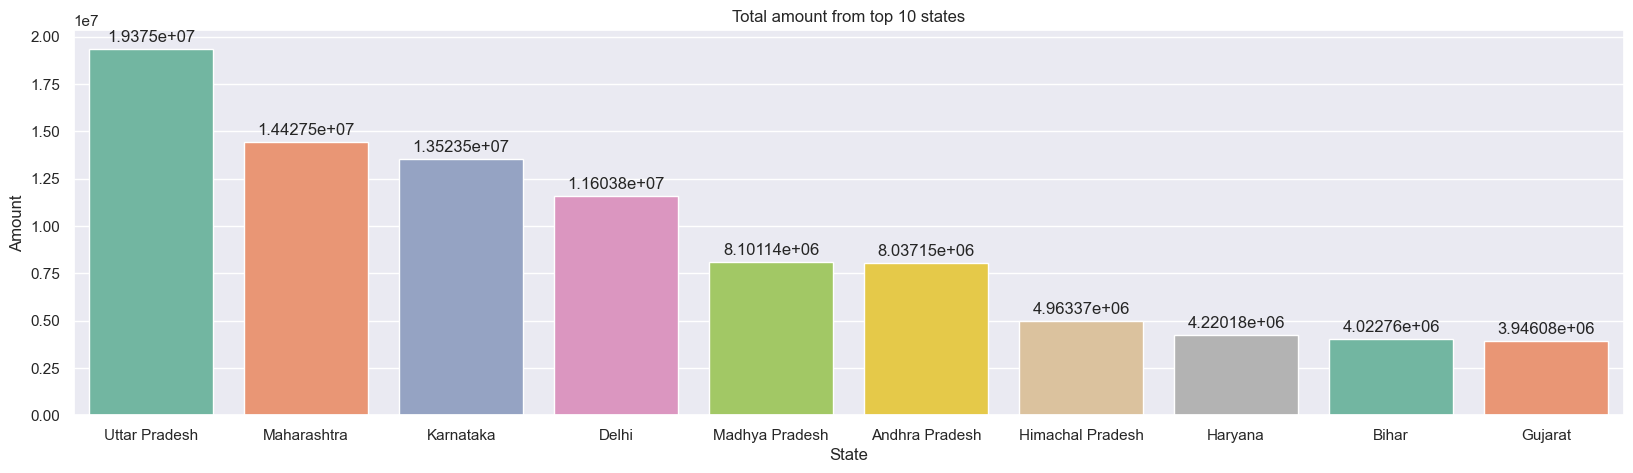

In [67]:
# Total amount from top 10 states 

sns.set(rc={'figure.figsize':(20,5)})

sales_state = df.groupby('State', as_index=False)['Amount'].sum()
sales_state = sales_state.sort_values(by='Amount', ascending=False).head(10)

ax = sns.barplot(x='State', y='Amount', data=sales_state, hue='State', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)  
plt.title("Total amount from top 10 states")
plt.show()

Marital Status

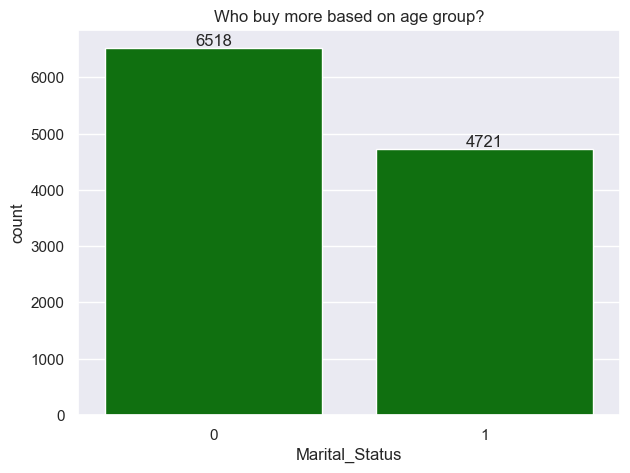

In [78]:
ax = sns.countplot(data=df, x='Marital_Status', color= 'green', legend=True)

for container in ax.containers:
    ax.bar_label(container)

sns.set(rc={'figure.figsize':(7,5)})    
    
plt.title("Who buy more based on age group?")
plt.show()

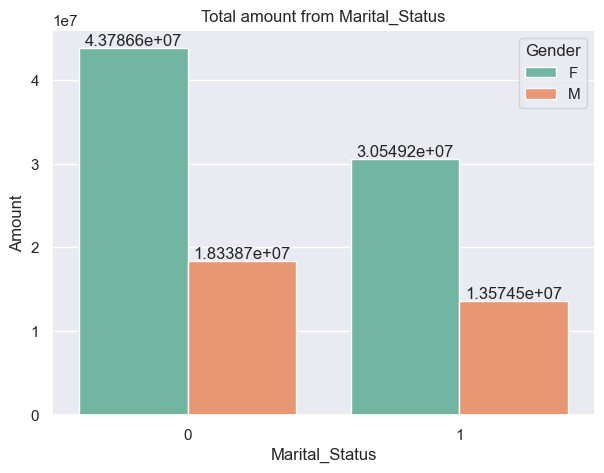

In [69]:
# Total amount from Marital_Status 

sns.set(rc={'figure.figsize':(7,5)})

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum()
sales_state = sales_state.sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Marital_Status', y='Amount', data=sales_state, hue='Gender', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)  
plt.title("Total amount from Marital_Status")
plt.show()

From above graphs we can see that most of the buyers are female and Married

Occupation

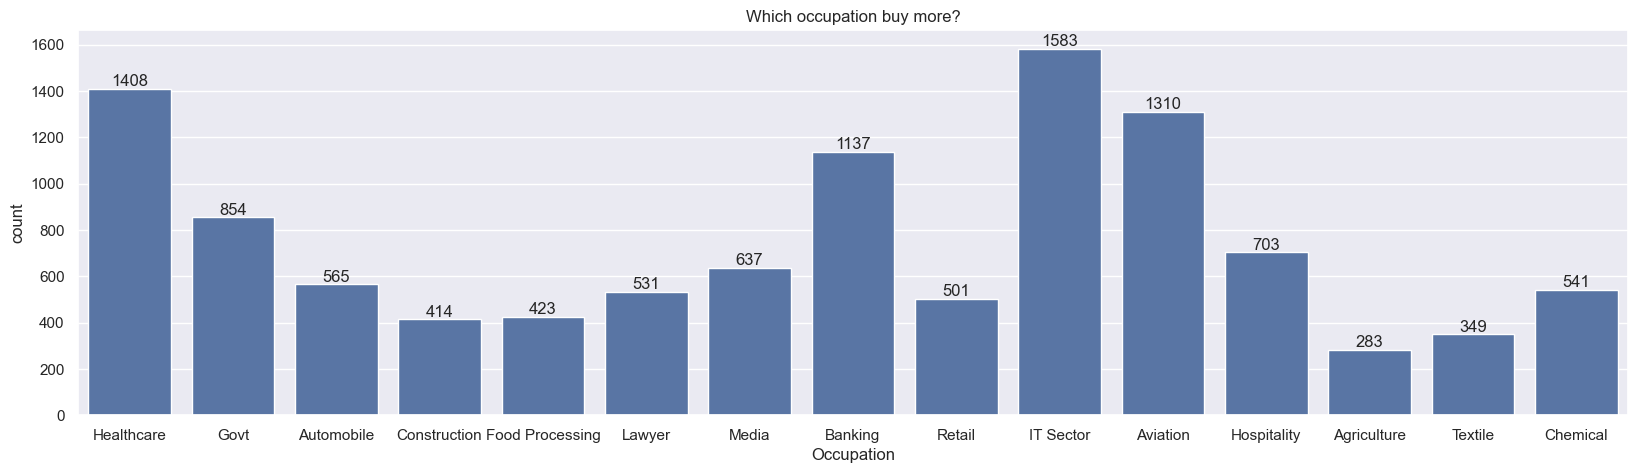

In [70]:
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data=df, x='Occupation')

for container in ax.containers:
    ax.bar_label(container)    
    
plt.title("Which occupation buy more?")
plt.show()

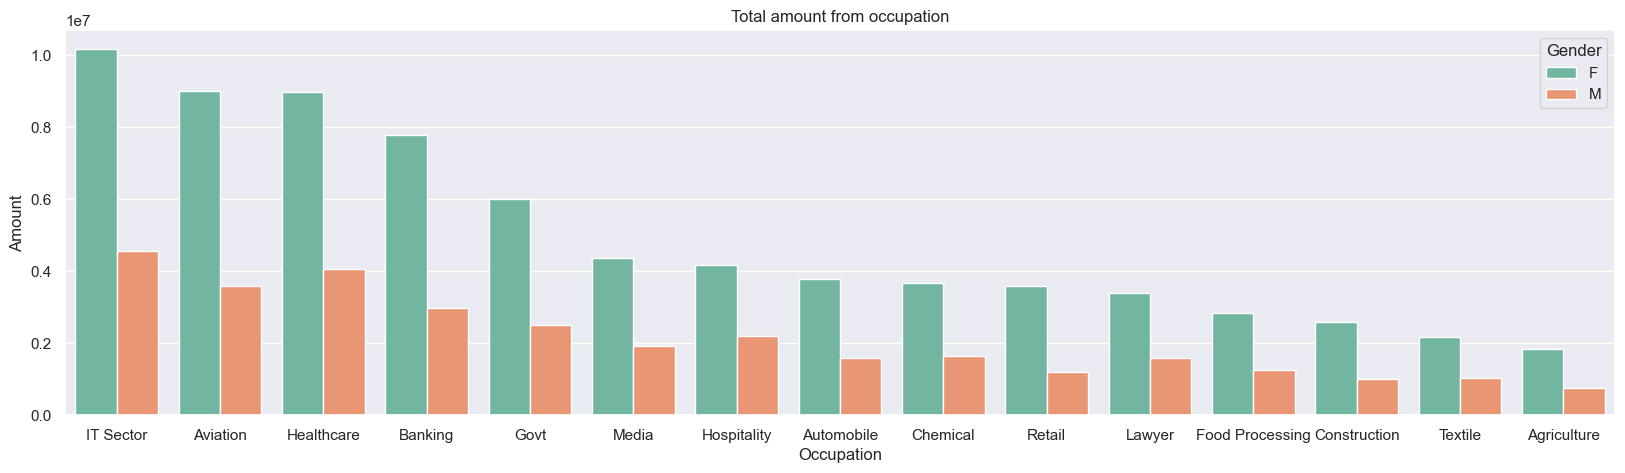

In [71]:
# Total amount from occupation 

sns.set(rc={'figure.figsize':(20,5)})

sales_state = df.groupby(['Occupation', 'Gender'], as_index=False)['Amount'].sum()
sales_state = sales_state.sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Occupation', y='Amount', data=sales_state, hue='Gender', palette='Set2')
 
plt.title("Total amount from occupation")
plt.show()

From above graphs we can see that most of the buyers are female and from IT Sector

Product_Category

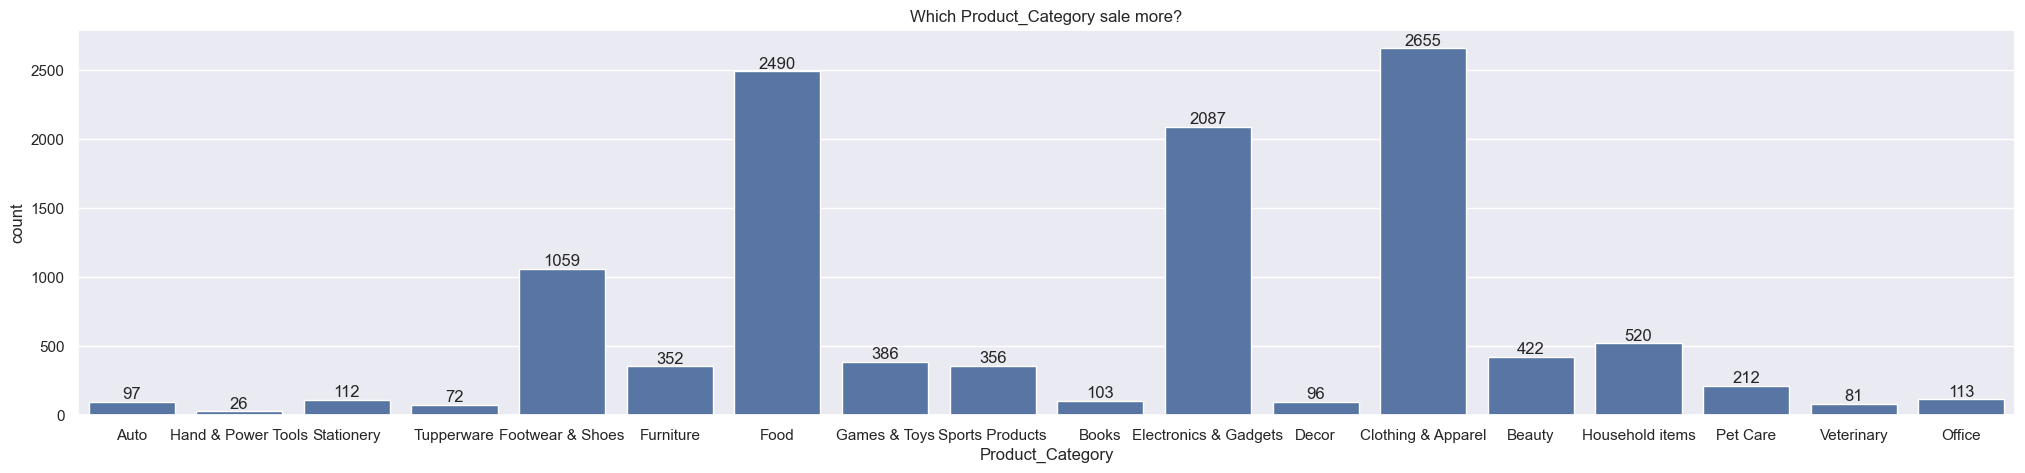

In [72]:
sns.set(rc={'figure.figsize':(25,5)})

ax = sns.countplot(data=df, x='Product_Category')

for container in ax.containers:
    ax.bar_label(container)    
    
plt.title("Which Product_Category sale more?")
plt.show()

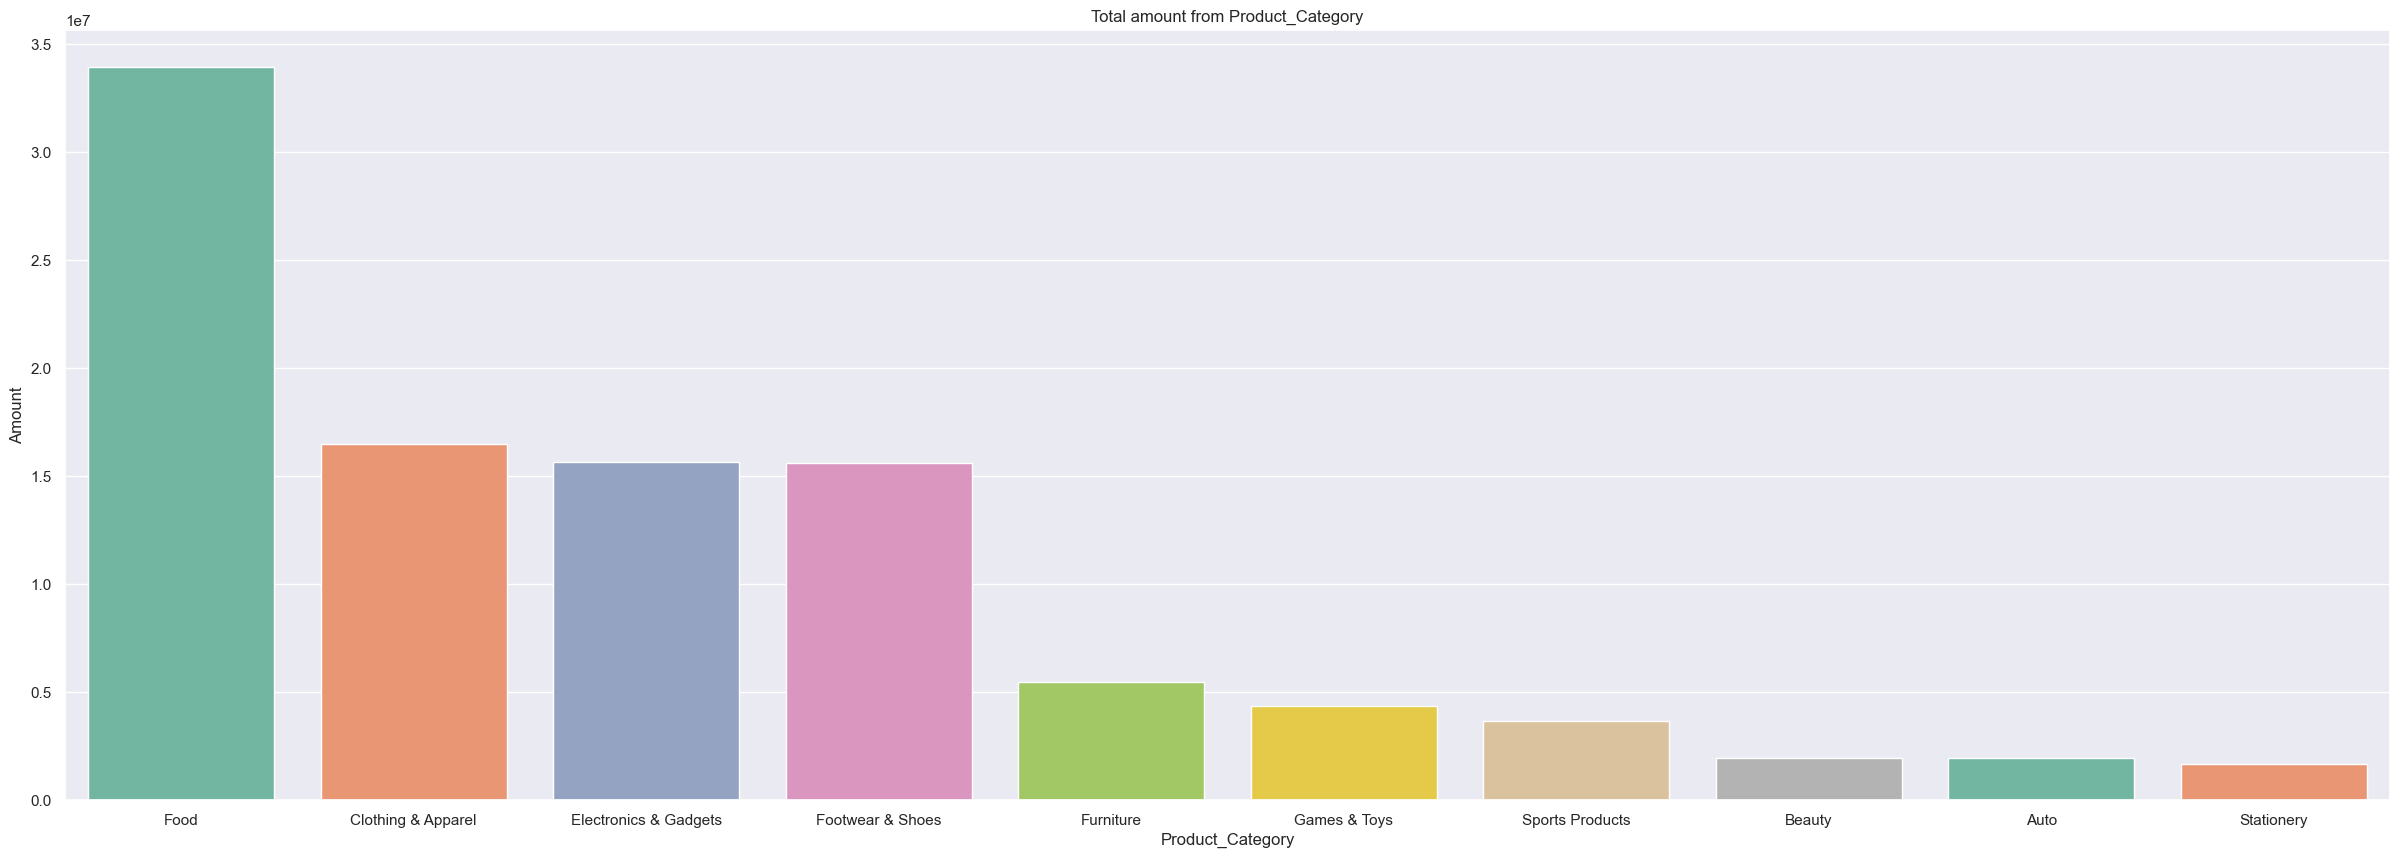

In [73]:
# Total amount from Product_Category 

sns.set(rc={'figure.figsize':(30,10)})

sales_state = df.groupby('Product_Category', as_index=False)['Amount'].sum()
sales_state = sales_state.sort_values(by='Amount', ascending=False).head(10)

ax = sns.barplot(x='Product_Category', y='Amount', data=sales_state, hue='Product_Category', palette='Set2')
 
plt.title("Total amount from Product_Category")
plt.show()

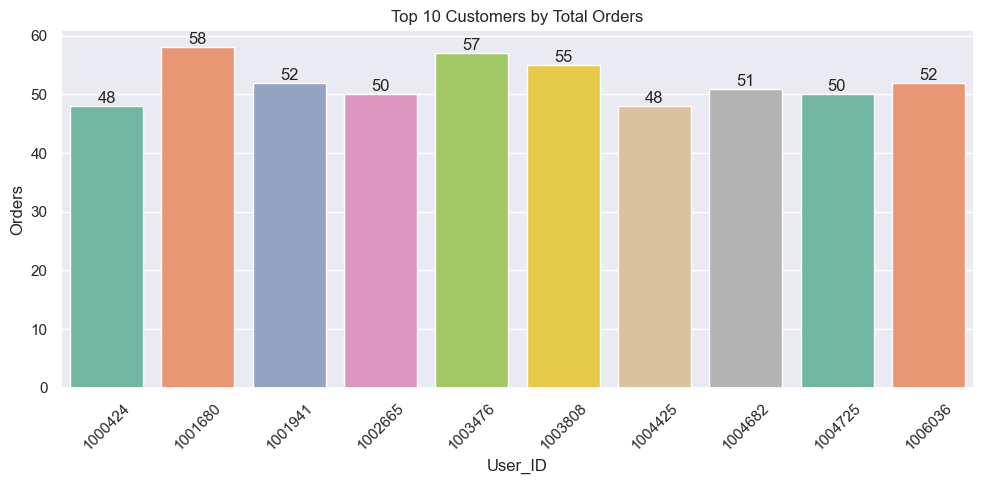

In [74]:
# Top 10 customers by total orders
top_customers = (
    df.groupby('User_ID', as_index=False)['Orders'].sum()
      .sort_values(by='Orders', ascending=False).head(10)
)

plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_customers, x='User_ID', y='Orders', hue='User_ID', palette='Set2', legend=False)

for container in ax.containers:
    ax.bar_label(container) 

plt.xticks(rotation=45)
plt.title("Top 10 Customers by Total Orders")
plt.tight_layout()
plt.show()


Conclusion & Key Insights
-------------------------------------------

Sales data shows that married women aged 26–35 are the most active buyers, mainly from UP, Maharashtra, and Karnataka, and largely working in IT, Healthcare, and Aviation.

Food, Clothing, and Electronics dominate both orders and revenue, making them the core focus for future campaigns.

Recommendation:

Focus marketing on married women (26–35) in top states.

Offer personalized discounts and loyalty programs.

Ensure strong inventory and delivery network in key regions.

This targeted approach will improve sales, customer satisfaction, and overall growth.